In [54]:
##Importing the necessary libraries

In [34]:
import pandas as pd
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
voter = pd.read_excel('Voter_data.xlsx') #Loading the dataset

In [37]:
voter.head(6) #Taking a glance of the data

,town_id,turnout_total,turnout_male,turnout_female,registered_total,registered_male,registered_female,treatment,treatment_phase
0,171,413,208,205,1389,769,620,1,1
1,171,618,337,281,1544,859,685,0,1
2,171,377,215,162,1280,695,585,0,1
3,171,367,200,167,1551,850,701,0,1
4,171,265,128,137,1128,609,519,1,1
5,171,325,185,140,998,556,442,0,1


In [38]:
voter.info() #Checking for datatypes and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6970 entries, 0 to 6969
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   town_id            6970 non-null   int64
 1   turnout_total      6970 non-null   int64
 2   turnout_male       6970 non-null   int64
 3   turnout_female     6970 non-null   int64
 4   registered_total   6970 non-null   int64
 5   registered_male    6970 non-null   int64
 6   registered_female  6970 non-null   int64
 7   treatment          6970 non-null   int64
 8   treatment_phase    6970 non-null   int64
dtypes: int64(9)
memory usage: 490.2 KB


In [39]:
voter.describe() #Finding out basic statistics

,town_id,turnout_total,turnout_male,turnout_female,registered_total,registered_male,registered_female,treatment,treatment_phase
count,6970.000000,6970.000000,6970.000000,6970.000000,6970.000000,6970.000000,6970.000000,6970.000000,6970.000000
mean,200.980201,464.931707,253.307891,211.623816,973.809469,531.930416,438.726112,0.497274,1.483357
std,21.360832,153.747082,85.781391,70.677926,469.611039,266.403643,222.125543,0.500028,0.499759
min,171.000000,0.000000,0.000000,0.000000,-999.000000,-999.000000,-999.000000,0.000000,1.000000
25%,190.000000,353.000000,190.000000,161.000000,592.000000,321.000000,268.000000,0.000000,1.000000
50%,198.000000,456.000000,247.000000,207.000000,870.500000,479.000000,394.000000,0.000000,1.000000
75%,212.000000,564.000000,308.000000,257.000000,1331.750000,730.000000,600.750000,1.000000,2.000000
max,239.000000,1045.000000,597.000000,483.000000,1999.000000,1194.000000,991.000000,1.000000,2.000000


In [6]:
### Coloumns registered_total, registered_male and registered_female have incorrect (negative) values

<Axes: xlabel='registered_total', ylabel='Count'>

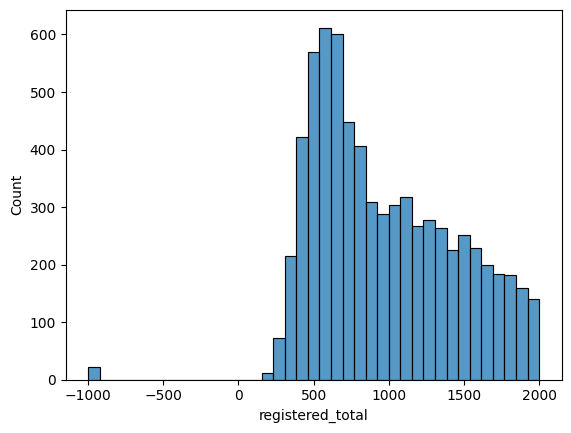

In [57]:
sns.histplot(voter, x='registered_total')

<Axes: xlabel='registered_male', ylabel='Count'>

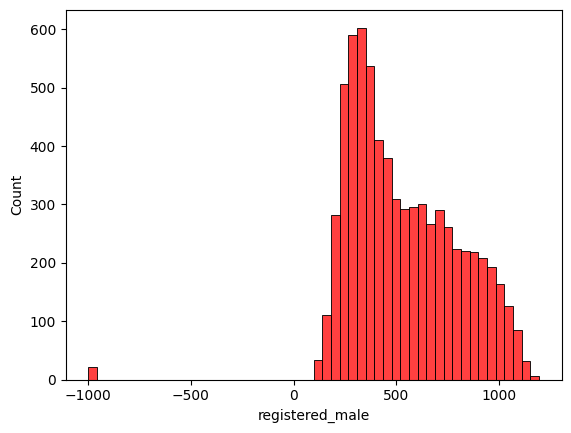

In [59]:
sns.histplot(voter, x='registered_male', color = 'red')

<Axes: xlabel='registered_female', ylabel='Count'>

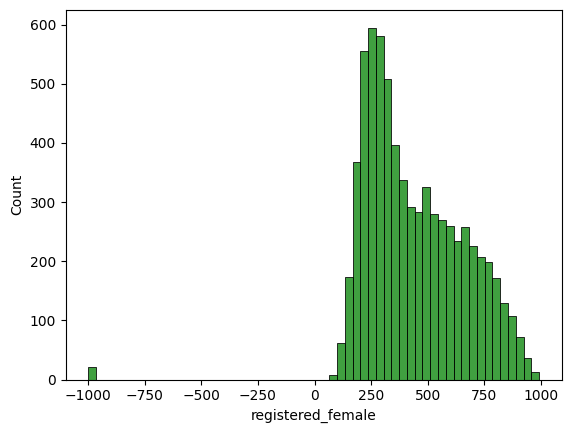

In [60]:
sns.histplot(voter, x='registered_female', color = 'g')

In [61]:
voter[voter['registered_total'] < 0]['registered_total'].value_counts() #Checking for the count of incorrect values

-999    20
-998     2
Name: registered_total, dtype: int64

In [62]:
voter[voter['registered_male'] < 0]['registered_male'].value_counts() #Checking for the count of incorrect values

-999    20
-998     2
Name: registered_male, dtype: int64

In [63]:
voter[voter['registered_female'] < 0]['registered_female'].value_counts()

-999    20
-998     2
Name: registered_female, dtype: int64

In [10]:
### Coloumns registered_total, registered_male and registered_female have 22 incorrect (negative) values
## Since the data is for voters, 0 or a positive number is a valid value, whereas a negative count is an invalid value

In [65]:
for x in voter.index: #Replacing the wrong values with None
  if voter.loc[x, "registered_total"] < 0:
    voter.loc[x, "registered_total"] = np.nan

for x in voter.index:
  if voter.loc[x, "registered_male"] < 0:
    voter.loc[x, "registered_male"] = np.nan

for x in voter.index:
  if voter.loc[x, "registered_female"] < 0:
    voter.loc[x, "registered_female"] = np.nan

In [74]:
m_rt = voter["registered_total"].median()
m_rm = voter["registered_male"].median()
m_rf = voter["registered_female"].median()

#As all the histograms are right-skewed, it is best to replace the wrong values with median of the coloumns

In [75]:
voter["registered_total"].fillna(m_rt, inplace = True) #Wrong values (i.e null values) replaced with median of every column
voter["registered_male"].fillna(m_rm, inplace = True)
voter["registered_female"].fillna(m_rf, inplace = True)

In [76]:
voter.info() #Checking once again now that the wrong values are replaced

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6970 entries, 0 to 6969
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   town_id            6970 non-null   int64  
 1   turnout_total      6970 non-null   int64  
 2   turnout_male       6970 non-null   int64  
 3   turnout_female     6970 non-null   int64  
 4   registered_total   6970 non-null   float64
 5   registered_male    6970 non-null   float64
 6   registered_female  6970 non-null   float64
 7   treatment          6970 non-null   int64  
 8   treatment_phase    6970 non-null   int64  
 9   turnout_rate       6970 non-null   float64
dtypes: float64(4), int64(6)
memory usage: 544.7 KB


In [77]:
voter["turnout_rate"] = voter['turnout_total']/voter['registered_total'] #Creating a new coloumn in the dataframe for turnout rate
voter.sample()

,town_id,turnout_total,turnout_male,turnout_female,registered_total,registered_male,registered_female,treatment,treatment_phase,turnout_rate
2006,191,569,340,229,1106.0,630.0,476.0,0,2,0.514467


In [78]:
voter["turnout_rate"].describe() #Checking turnout rates of individual polling booths

count    6970.000000
mean        0.573425
std         0.280617
min         0.000000
25%         0.336596
50%         0.476776
75%         0.917728
max         1.000000
Name: turnout_rate, dtype: float64

In [21]:
# Max turnout rate = 1.00
# Min turnout rate = 0.00

In [79]:
voter[voter["turnout_rate"] == 1.000000].shape #20 booths recorded the max turnout rate

(20, 10)

In [80]:
voter[voter["turnout_rate"] == 0.0].shape #4 booths recorded the min turnout rate

(4, 10)

In [82]:
voter.groupby(by='treatment')["treatment_phase"].value_counts() #By treatment, tabulating the number of booths in phases 1 and 2 of the study

treatment  treatment_phase
0          1                  1755
           2                  1749
1          1                  1846
           2                  1620
Name: treatment_phase, dtype: int64

In [83]:
(voter.groupby(by='town_id')["turnout_rate"].mean() > 0.75).value_counts() #Not a single district has a total turnout rate of 75% or above

False    27
Name: turnout_rate, dtype: int64

In [27]:
voter["turnout_rate_female"] = voter['turnout_female']/voter['registered_female']
voter.sample()

,town_id,turnout_total,turnout_male,turnout_female,registered_total,registered_male,registered_female,treatment,treatment_phase,turnout_rate,turnout_rate_female
1016,175,606,332,274,1293.0,728.0,565.0,0,1,0.468677,0.484956


In [28]:
voter.groupby(by='treatment')['turnout_rate_female'].mean()

treatment
0    0.568921
1    0.582492
Name: turnout_rate_female, dtype: float64

In [29]:
temp2 = voter.groupby(by='treatment').get_group(0)['turnout_rate_female']
temp3 = voter.groupby(by='treatment').get_group(1)['turnout_rate_female']

In [30]:
# Avg turnout rate for females in treatment booths = 0.568921
# Avg turnout rate for males in treatment booths = 0.582492

In [ ]:
# Doing t-test to test the null hypothesis
# H0 = Female turnout rate in treatment booths is equal to male turnout rate in treatment booths
# H1 = Female turnout rate in treatment booths is greater than to male turnout rate in treatment booths

In [31]:
voter.groupby(by='treatment')['turnout_rate_female'].var() #ratio is less than 4:1 so we can perform two sample t-test

treatment
0    0.079938
1    0.076650
Name: turnout_rate_female, dtype: float64

In [84]:
t_statistic, p_value = stats.ttest_ind(temp2, temp3, equal_var=True)
print(t_statistic)
print(p_value)

if p_value < 0.05:
  print("Reject the Null Hypothesis (H0) and Accept the Alternative Hypothesis (H1)")

-2.0244201980296084
0.042965006765050495
Reject the Null Hypothesis (H0) and Accept the Alternative Hypothesis (H1)
